# P7: Predictive ML Project  
**Author:** Sandra Otubushin 

[GitHub Repository Link](https://github.com/larrygold18/datafun-07-ml)


In [15]:
import sys
print("Interpreter:", sys.executable)

import numpy as np, pandas as pd, matplotlib, seaborn, scipy, sklearn
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)
print("SciPy:", scipy.__version__)
print("Sklearn:", sklearn.__version__)
print("✅ All scientific libraries imported successfully!")


Interpreter: c:\Users\larry\Documents\projects\datafun-07-ml\.venv312\Scripts\python.exe
NumPy: 2.3.3
Pandas: 2.3.3
Matplotlib: 3.10.6
Seaborn: 0.13.2
SciPy: 1.16.2
Sklearn: 1.7.2
✅ All scientific libraries imported successfully!


In [16]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.precision', 2)
sns.set_theme()


## Part 1 - Chart a Straight Line


In [17]:
# Create Celsius values from -20°C to 50°C, step 5
df_cf = pd.DataFrame({"Celsius": np.arange(-20, 51, 5)})
# Straight-line conversion: F = 1.8*C + 32  =>  y = m*x + b
m, b = 1.8, 32
df_cf["Fahrenheit"] = m*df_cf["Celsius"] + b

df_cf.head()  # quick peek


,Celsius,Fahrenheit
0,-20,-4.0
1,-15,5.0
2,-10,14.0
3,-5,23.0
4,0,32.0


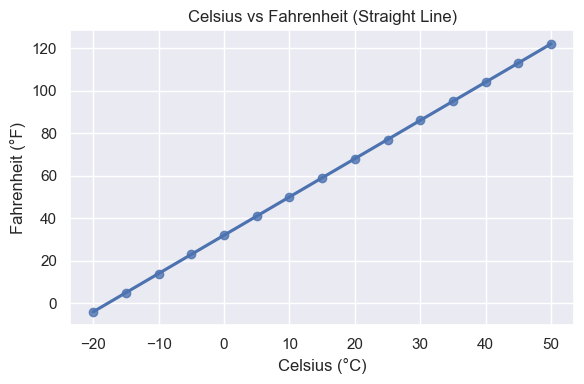

In [18]:
# Scatter + regression line (straight line)
fig = plt.figure(figsize=(6,4))
sns.regplot(x="Celsius", y="Fahrenheit", data=df_cf, ci=None)  # uses the DataFrame
plt.title("Celsius vs Fahrenheit (Straight Line)")
plt.xlabel("Celsius (°C)")
plt.ylabel("Fahrenheit (°F)")
plt.tight_layout()
plt.savefig("../charts/part1_c_vs_f.png", dpi=200)  # file saved in /charts
plt.show()


In [19]:
# Check that y = m*x + b exactly reproduces Fahrenheit
check = (df_cf["Fahrenheit"] - (m*df_cf["Celsius"] + b)).abs().max()
print("Max absolute diff from y=mx+b:", check)


Max absolute diff from y=mx+b: 0.0


## Part 2 - Prediction
### Section 1 - Data Acquisition


In [20]:
# Load NYC January average high temps from /data
# Adjust filename if yours is different
nyc_df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
nyc_df.head()



,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection


In [21]:
nyc_df.tail(), nyc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


(       Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3,
 None)

### Section 3 - Data Cleaning


In [ ]:
# Rename columns to match project convention
nyc_df = nyc_df.rename(columns={
    "Date": "Year",
    "Value": "Temperature"
})

# Keep only the two relevant columns
nyc_df = nyc_df[["Year", "Temperature"]].dropna()

# Convert data types
nyc_df["Year"] = nyc_df["Year"].astype(int)
nyc_df["Temperature"] = nyc_df["Temperature"].astype(float)

nyc_df.head()


KeyError: "['Temperature'] not in index"

### Section 4 - Descriptive Statistics


In [ ]:
pd.set_option('display.precision', 2)
nyc_df.describe()



### Section 5 - Build the Model


In [ ]:
from scipy import stats

lin = stats.linregress(x=nyc_df["Year"], y=nyc_df["Temperature"])
print("Slope (m):", lin.slope)
print("Intercept (b):", lin.intercept)
print("R-value:", lin.rvalue)
print("P-value:", lin.pvalue)
print("Standard error:", lin.stderr)



### Section 6 - Predict


In [ ]:
pred_2024_part2 = lin.slope * 2024 + lin.intercept
print("Predicted Avg High in Jan 2024:", round(pred_2024_part2, 2), "°F")


### Section 7 - Visualizations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(7,4))
sns.scatterplot(x="Year", y="Temperature", data=nyc_df, s=20, color="blue")

# best-fit line
xs = np.linspace(nyc_df["Year"].min(), 2024, 200)
ys = lin.slope * xs + lin.intercept
plt.plot(xs, ys, color="red", linewidth=2)

plt.title("NYC Avg High in January — SciPy Best-Fit Line")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.tight_layout()
plt.savefig("../charts/part2_nyc_scipy.png", dpi=200)
plt.show()
